In [3]:
import numpy as np
import matplotlib.pyplot as plt
get_ipython().magic(u'matplotlib inline')
import pandas as pd
import math
import time
from pylab import figure, axes, pie, title, show

#from joblib import Parallel, delayed
#import multiprocessing


In [6]:
window_seq=np.power(2,range(1,8))
n=1000
cluster=range(500,520)
target=np.concatenate([np.zeros(int(n/2))+1, np.zeros(int(n/2))])
window_seq




array([  2,   4,   8,  16,  32,  64, 128])

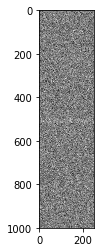

In [9]:
size=int(n/4)
X=np.zeros((n,size))#choose n/4 = # of observations per pixel.
idx = [i for i in range(n) if i not in cluster]
for i in idx:
    X[i,:]=np.random.randn(size)
    
for i in cluster:
    X[i,:]=np.random.randn(size)+math.sqrt((2*math.log(n/len(cluster)))/len(cluster))

plt.gray()
plt.imshow(X)

In [17]:
######implement the scan in the context that we know the true size of the cluster and compare accuracy
#1. find rho

0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


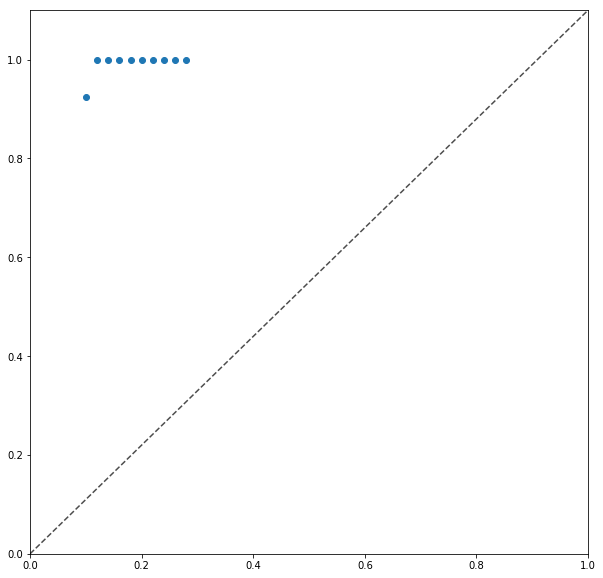

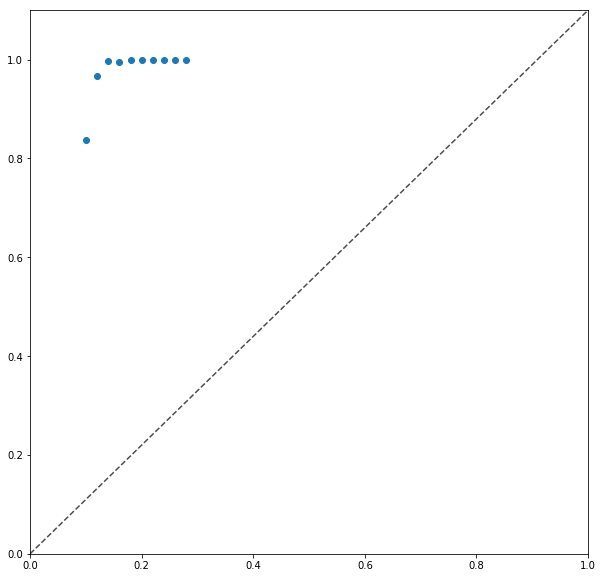

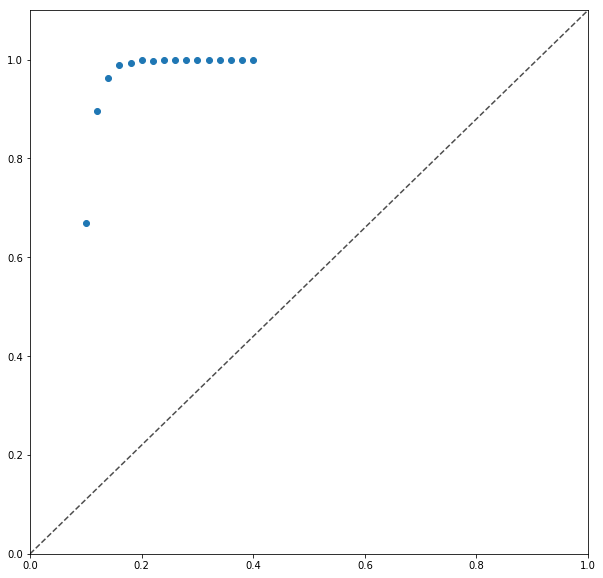

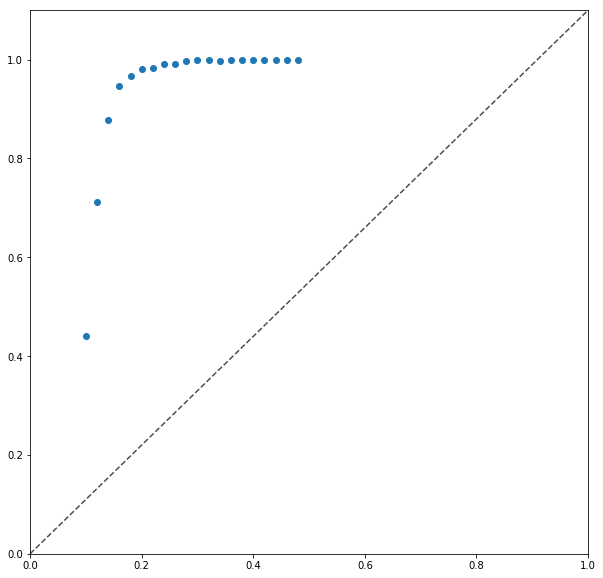

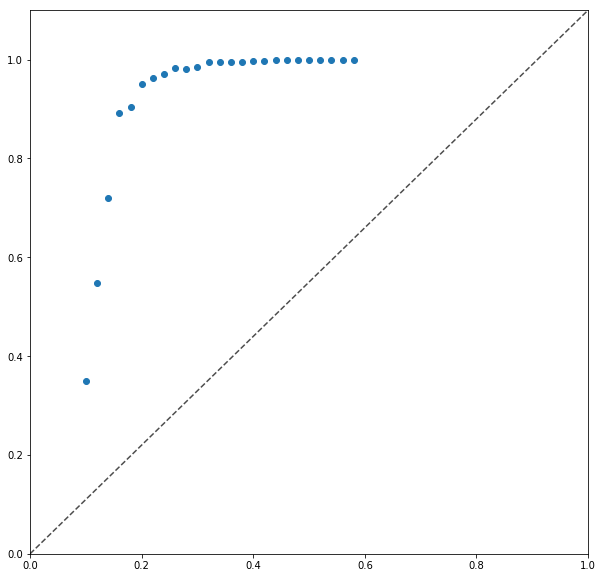

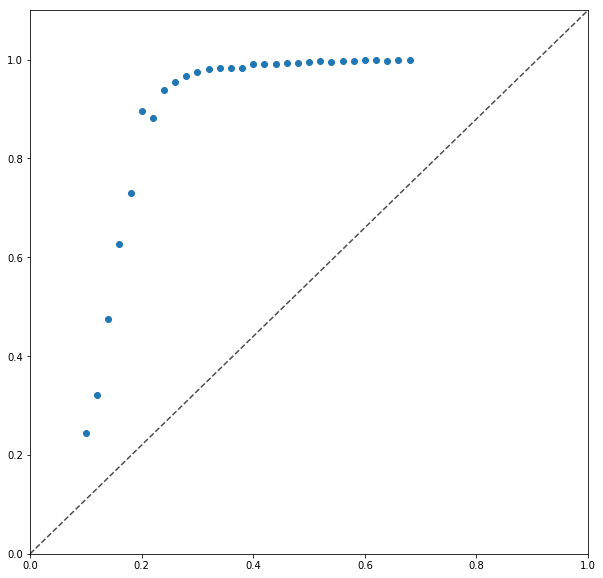

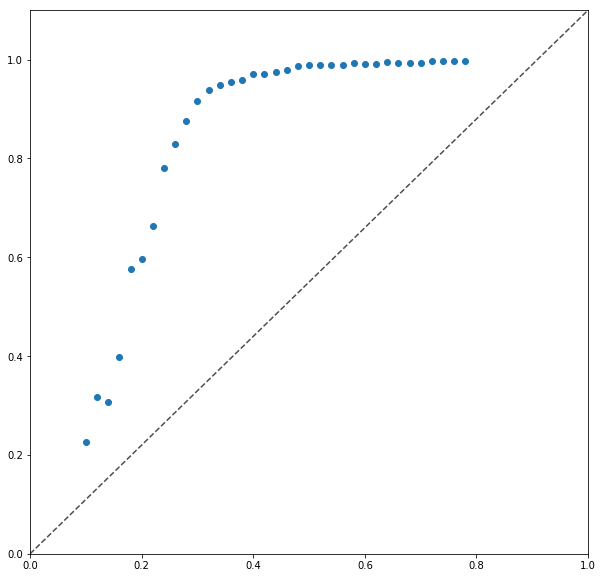

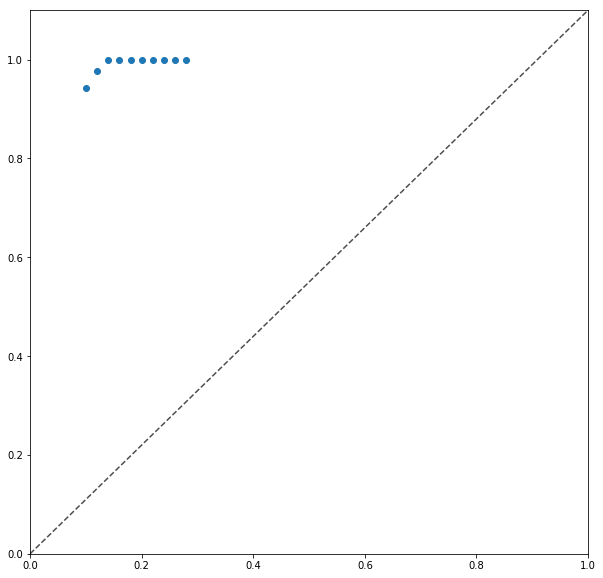

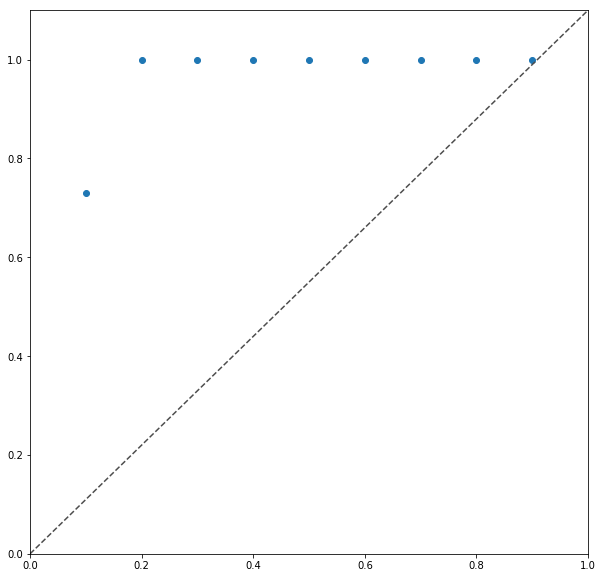

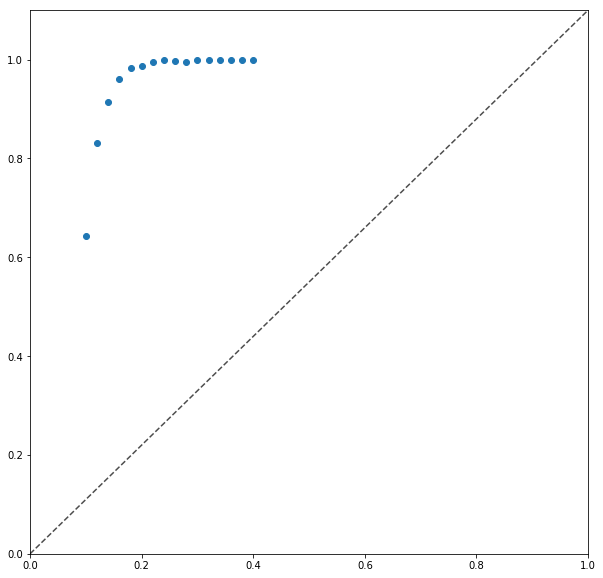

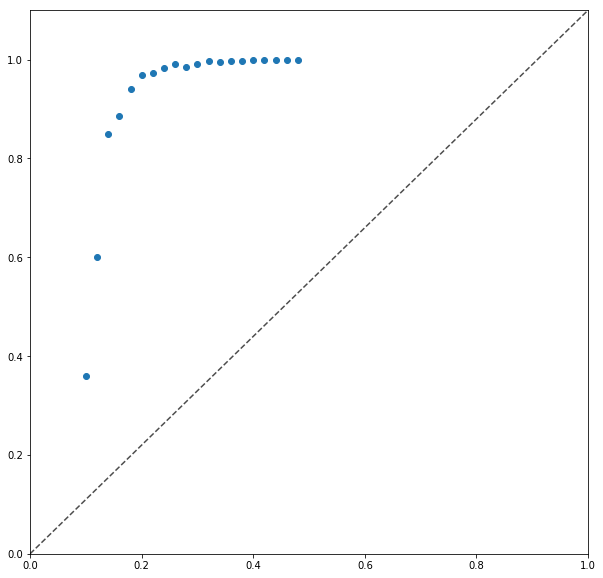

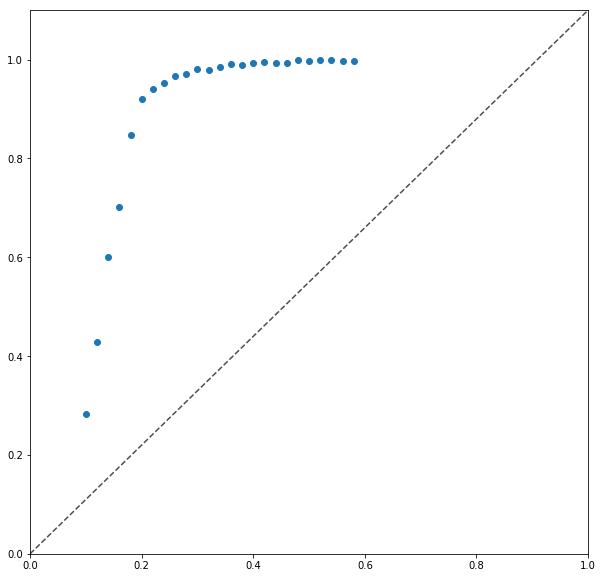

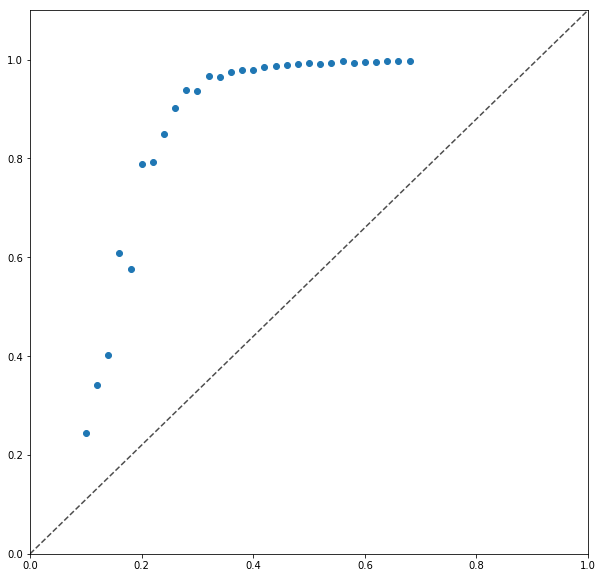

In [3]:

n=1000
B=100

contain_tmp1=np.zeros(B)
sym_diff_tmp1=np.zeros(B)
rho_tmp1=np.zeros(B)
cluster_seq=np.power(2,range(1,8))
cluster_seq=cluster_seq.tolist()
for i in range(6):
    cluster_seq.append((cluster_seq[i]+cluster_seq[i+1])/2)
    
for m in range(len(cluster_seq)):
    cluster_size=cluster_seq[m]
    window=cluster_size   
    if cluster_size <6:
        mu_seq=np.arange(0.1, 0.3, 0.02)
    elif 6<=cluster_size and cluster_size <8:
        mu_seq=np.arange(0.1, 1, 0.1)
    elif 8<=cluster_size and cluster_size <12:
        mu_seq=np.arange(0.1, 0.4, 0.1)
    elif 12<=cluster_size and cluster_size <32:
        mu_seq=np.arange(0.1, 0.5, 0.02)
    elif 32<=cluster_size and cluster_size <64:
        mu_seq=np.arange(0.1, 0.6, 0.02)
    elif 64<=cluster_size and cluster_size <96:
        mu_seq=np.arange(0.1, 0.7, 0.02)
    else:
        mu_seq=np.arange(0.1, 1, 0.02)
    
    size1=np.zeros(len(mu_seq))
    sym_diff1=np.zeros(len(mu_seq))
    time_seq1=np.zeros(len(mu_seq))
    rho1=np.zeros(len(mu_seq))
        
    for l in range(len(mu_seq)):
        startTime=time.time()
        print(l)     
        for k in range(B):
            cluster=range(n/2,n/2+cluster_size)       
            d=np.zeros((n,n/4))#choose n/4 = # of observations per pixel.
            idx = [i for i in range(n) if i not in cluster]
            for i in idx:
                d[i,:]=np.random.randn(n/4)
            for i in cluster:
                d[i,:]=(np.random.randn(n/4)+mu_seq[l]*math.sqrt((2*math.log(n/len(cluster)))/len(cluster)))
            z_score=np.zeros(n)
            for i in range(n):
                z_score[i]=math.pow(np.mean(d[i,])/(np.std(d[i,])/math.sqrt(n/4)),2)       
            scan_tmp=np.zeros(n-window+1,dtype='float64')
            for i in range(n-window+1):
                scan_tmp[i]=sum(z_score[i:(i+window)])/math.sqrt(window)
            I_hat=max(scan_tmp)
            cluster_idx=np.where(scan_tmp==I_hat)[0]

            sym_diff_tmp1[k]=len((set(cluster))^set(range(cluster_idx,cluster_idx+window)))
            rho_tmp1[k]=len((set(cluster)).intersection(set(range(cluster_idx,cluster_idx+window))))/math.sqrt(len(cluster)*len(range(cluster_idx,cluster_idx+window)))      
        sym_diff1[l]=np.mean(sym_diff_tmp1)
        rho1[l]=np.mean(rho_tmp1)
        endTime=time.time()
        time_seq1[l]=(endTime-startTime)/B
    
    alpha[m]=rho1[0]
    f,ax =plt.subplots(figsize=(10, 10))
    ax.set_xlim([0,1])
    ax.set_ylim([0,1.1])
    ax.scatter(mu_seq,rho1)
    ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3")
    #plt.savefig('rho_true_{0}.png'.format(window))
    np.savetxt('rho_true_{0}.txt'.format(window),rho1) 
    

In [17]:
def truesize(n):
    j=0
    for i in range(n):
        j=j+1
    return(j)
res=Parallel(n_jobs=5)(delayed(truesize)(k) for k in range(100000))

In [12]:
res

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [13]:
n=1000
B=100

contain_tmp1=np.zeros(B)
sym_diff_tmp1=np.zeros(B)
rho_tmp1=np.zeros(B)
cluster_seq=np.power(2,range(1,8))
cluster_seq=cluster_seq.tolist()
for i in range(6):
    cluster_seq.append((cluster_seq[i]+cluster_seq[i+1])/2)
    
cluster_size=128
window=cluster_size   
mu_seq=np.arange(0.1, 1, 0.02)
    
size1=np.zeros(len(mu_seq))
sym_diff1=np.zeros(len(mu_seq))
time_seq1=np.zeros(len(mu_seq))
rho1=np.zeros(len(mu_seq))
        
for l in range(len(mu_seq)):
    startTime=time.time()
    print(l)     
    for k in range(B):
        cluster=range(n/2,n/2+cluster_size)       
        d=np.zeros((n,n/4))#choose n/4 = # of observations per pixel.
        idx = [i for i in range(n) if i not in cluster]
        for i in idx:
            d[i,:]=np.random.randn(n/4)
        for i in cluster:
            d[i,:]=(np.random.randn(n/4)+mu_seq[l]*math.sqrt((2*math.log(n/len(cluster)))/len(cluster)))
        z_score=np.zeros(n)
        for i in range(n):
            z_score[i]=math.pow(np.mean(d[i,])/(np.std(d[i,])/math.sqrt(n/4)),2)       
        scan_tmp=np.zeros(n-window+1,dtype='float64')
        for i in range(n-window+1):
            scan_tmp[i]=sum(z_score[i:(i+window)])/math.sqrt(window)
        I_hat=max(scan_tmp)
        cluster_idx=np.where(scan_tmp==I_hat)[0]

        sym_diff_tmp1[k]=len((set(cluster))^set(range(cluster_idx,cluster_idx+window)))
        rho_tmp1[k]=len((set(cluster)).intersection(set(range(cluster_idx,cluster_idx+window))))/math.sqrt(len(cluster)*len(range(cluster_idx,cluster_idx+window)))      
    sym_diff1[l]=np.mean(sym_diff_tmp1)
    rho1[l]=np.mean(rho_tmp1)
    endTime=time.time()
    time_seq1[l]=(endTime-startTime)/B
    
f,ax =plt.subplots(figsize=(10, 10))
ax.set_xlim([0,1])
ax.set_ylim([0,1.1])
ax.scatter(mu_seq,rho1)
ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3")
#plt.savefig('rho_true_{0}.png'.format(window))
np.savetxt('rho_true_{0}.txt'.format(window),rho1) 

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26


KeyboardInterrupt: 

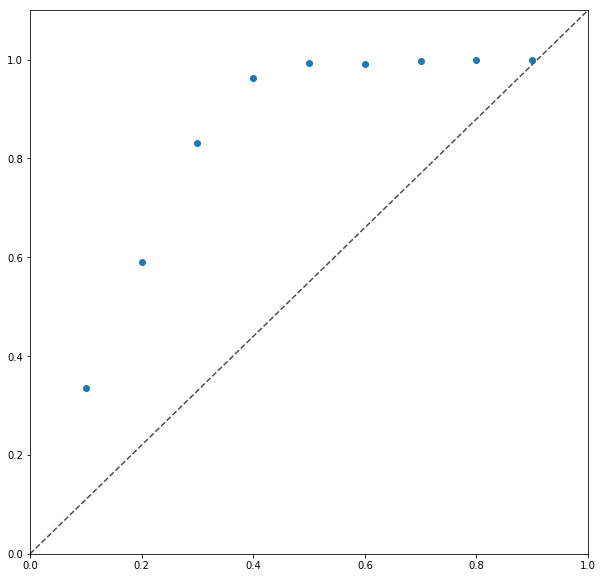

In [8]:
f,ax =plt.subplots(figsize=(10, 10))
ax.set_xlim([0,1])
ax.set_ylim([0,1.1])
ax.scatter(mu_seq,rho1)
ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3")
#plt.savefig('rho_true_100.png')
np.savetxt('rho_true_100.txt',rho1)

array([ 117.4,  125.1,  102. ,   81.2,   80. ,   80. ,   80. ,   80. ,
         80. ])

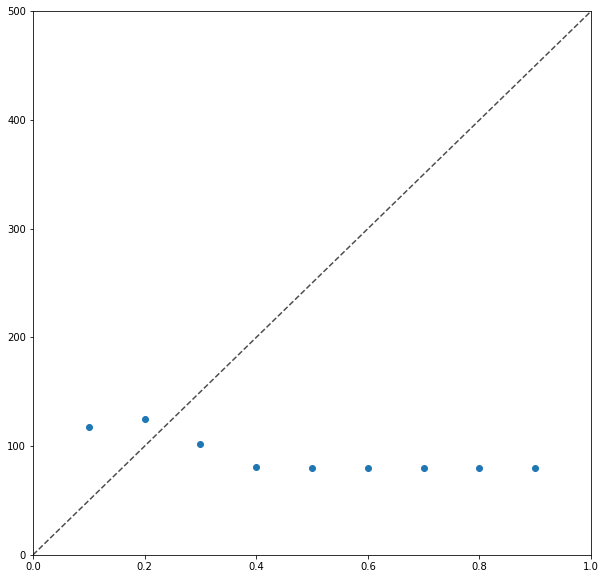

In [89]:
f,ax =plt.subplots(figsize=(10, 10))
ax.set_xlim([0,1])
ax.set_ylim([0,500])
ax.scatter(mu_seq,size1)
ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3")
size1

In [93]:
#### implement the scan in the context that we search every size up to n/2 (cluster size) and compare accuracy
#1.find rho

In [26]:
alpha

[0.014999999999999999,
 0.0,
 0.012500000000000001,
 0.0062500000000000003,
 0.012500000000000001,
 0.059374999999999997,
 0.141171875,
 0.0033333333333333331,
 0.0083333333333333332,
 0.0074999999999999997,
 0.025416666666666671,
 0.053541666666666668,
 0.063541666666666663]

In [24]:
rho1

array([ 0.09864583])